This notebook is to get some statistics about the sorted kernel.

In [1]:
import os, sys

PROJ_DIR = os.path.expanduser("~/GitWS/Transmisstion-Phase")
DATA_DIR = os.path.join(PROJ_DIR, "data")
SRC_DIR = os.path.join(PROJ_DIR, "src")
LOGS_DIR = os.path.join(PROJ_DIR, "logs", "exp1")
SCRIPTS_DIR = os.path.join(PROJ_DIR, "scripts")
CHECKPOINTS_DIR = os.path.join(PROJ_DIR, "checkpoints")
RESULTS_DIR = os.path.join(PROJ_DIR, "results")

from torchvision import datasets, transforms
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
DATASET = 'MNIST'
KERNEL = 'MaskSum'

In [3]:
def load_npz(idx: int) -> np.ndarray:
    npz_fname = os.path.join(DATA_DIR, 
                             DATASET, 
                             f"{KERNEL}Kernel_sorted",
                             f"{idx}.npz"
                            )
    return np.load(npz_fname)['data'].astype(np.float32)

In [4]:
dataloader = eval('datasets.'+DATASET)(DATA_DIR, train=True, download=True, 
                  transform=transforms.ToTensor()
                 )

In [5]:
# if a sample is mostly similar to itself
self_is_max = 0
self_not_max = 0

In [6]:
# ratio of positive/negative distances
pos_num = 0
neg_num = 0
zero_num = 0 
ZERO_THERESHOLD = 0.1

In [7]:
for idx in trange(len(dataloader)):
    dis_mat = load_npz(idx)
    
    if dis_mat[1, 0] == dis_mat[2, 0]:
        self_is_max += 1
    else:
        self_not_max += 1

    zero_num += np.count_nonzero(np.abs(dis_mat[0, :]) < ZERO_THERESHOLD)
    pos_num += np.count_nonzero(dis_mat[0, :] >= ZERO_THERESHOLD)
    neg_num += np.count_nonzero(dis_mat[0, :] <= -ZERO_THERESHOLD)

  0%|          | 0/60000 [00:00<?, ?it/s]

In [8]:
print(self_is_max / self_not_max)

0.8828845791752965


In [9]:
sum = pos_num + neg_num + zero_num
print(pos_num / sum, neg_num / sum, zero_num / sum)

0.9974252001355532 0.00257340433215002 1.3955322966839442e-06


In [10]:
# distance vector of all samples, a concatenation of all kernel vectors
dis_vec = []
for idx in trange(5000):
    dis_mat = load_npz(idx)
    dis_vec.append(dis_mat[0, :])
    del dis_mat
dis_vec = np.concatenate(dis_vec)

  0%|          | 0/5000 [00:00<?, ?it/s]

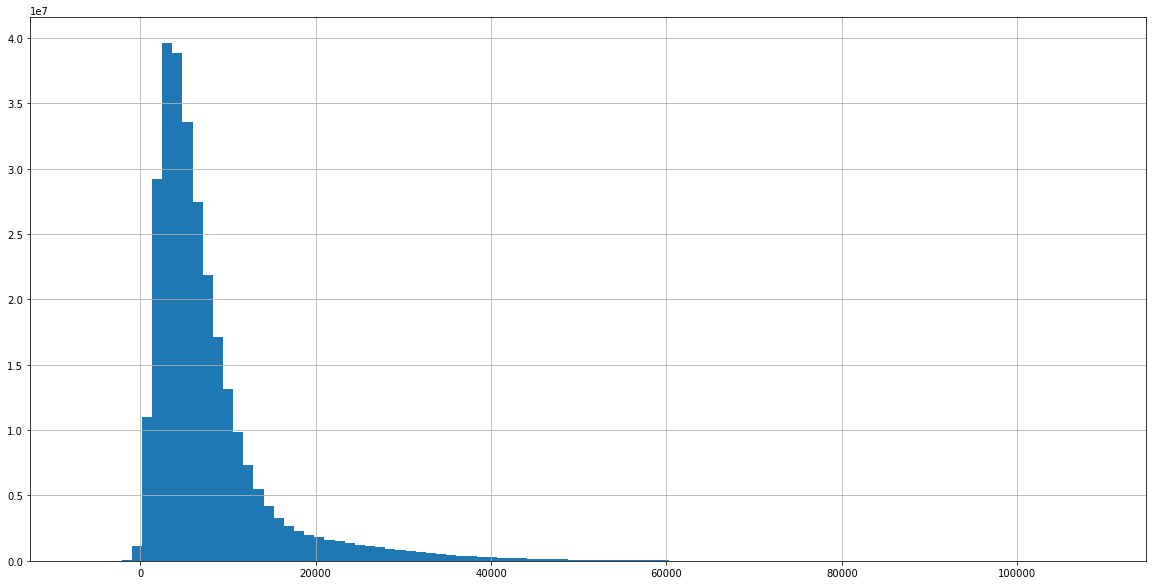

In [11]:
plt.hist(dis_vec, density=False, bins=100) 
plt.grid()
plt.show()

In [12]:
# if the top-k similar samples are from the same class
K = 100
same_class = 0
diff_class = 0

In [ ]:
for idx in trange(len(dataloader)):
    dis_mat = load_npz(idx)
    src_label = dataloader[int(dis_mat[1, 0])][1]

    num_iter = K if K < dis_mat.shape[1] else dis_mat.shape[1]
    for i in range(num_iter):
        if src_label == dataloader[int(dis_mat[2, i])][1]:
            same_class += 1
        else:
            diff_class += 1